# Predicting House Prices with Regression using TensorFlow

# Task 1: Introduction

---

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

__Data Source:__ https://www.kaggle.com/datasets/mubin2509/housepricedata

To summarize, the problem we're trying to tackle is this:

Given some data with these features and the corresponding
price for various houses, *can we create and train a model that will give us fairly
accurate price predictions for new, unseen data?*


![Regression](images/regression.png)

Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. In this project, we're going to use __Tensorflow__, which is an open source machine learning library. It is one of the most popular and widely used ones
at the moment, and we are going to use __Keras__, which is
a high level interface to tensorflow. Keras provides the users with a simple to use interface, and it does the heavy lifting behind the scenes, leaving developers to focus on just the high level details.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries imported.')

Libraries imported.


__Note:__

tf.logging was for Logging and Summary Operations and in TF 2.0 it has been removed in favor of the open-source absl-py, and to make the main tf.* namespace has functions that will be used more often.

https://stackoverflow.com/questions/55318626/module-tensorflow-has-no-attribute-logging

# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [4]:
df = pd.read_csv('data.csv')
df.head()

,0,2009,21,9,6,84,121,14264
0,1,2007,4,2,3,86,121,12032
1,2,2016,18,3,7,90,120,13560
2,3,2002,13,2,2,80,128,12029
3,4,2014,25,5,8,81,122,14157
4,5,2008,11,9,3,88,126,14287


As we can see above, our df does not have any column name.

In [5]:
# Let's create a column nam
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']

# let's read our df again and assign our column names
df = pd.read_csv('data.csv', names = column_names)

# check head again of our df
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


Now our data is loaded with column names. Here every row represents a single sale of a house - for various houses.

For example, the first row essentially tells us that
this house was sold in 2009 when it was 21 years
old. And it was at a distance of nine. This measure of distance nine could be nine kilometers
or miles from the city center. It had six stores nearby in the locality. The location in latitude and longitude are also specified. And lastly, price column shows the price that it was sold for.

In [6]:
# check the shape of the df
df.shape

(5000, 8)

We see here that there are a few thousands of such entries. 
In this project, what we're trying to achieve is create a neural network model,
which can learn the input, output mapping or the underlying
mathematical function between these six features, from __date__
to __longitude__, and the label, which is
__price__.

## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [9]:
# use isna function of pandas
# this function will return a boolean value of True or False for each column
# in each row of our data
# however, since there are thousands of rows here, it's practical to
# use also the sum() function

df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

It seems like we don't have any missing values.
So that is great. Because there are no missing values, we can simply move to the next task and start working on data normalization.

# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.

We may remember that neural network model is trained
with the help of an optimization algorithm that tries
to minimize the difference between ground truth
and the model's predictions.
Normalization of data makes it easier for such
an optimization algorithm to take gradient steps in the right
direction more consistently. 

Normalization is simply changing
the distribution of different features so that the values
for different features are in similar ranges.

Now we might remember that the first column that we have is
simply a serial number, so this is not a real feature.

In [11]:
# check again the head to verify
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [12]:
# Since these are not real features, we can ignore this using iloc
df = df.iloc[:, 1:]
# The first argument here is rows, and the second
# one is columns. So we can ignore the first column using the above input.
# Now this __iloc__ simply means that you're selecting data for your rows and your columns.
# The ":1" means that we are selecting columns one onward, so we're ignoring
# the one which is the first one. And then from the second column onwards, we are selecting all
# of them till the end.

# Now let's normalize our data using Pandas. 
df_norm = (df - df.mean())/df.std()
# We can use df.mean() and that will give us column wise
# values. For each column, there will be a mean value,
# and this operation will be column wise.
# And then we will divide this value by standard deviation.
# And again that will be for each column.
# So this actually makes it super simple to find out
# the normalized values because we don't have to go
# through each column separately.
# It's automatically done by pandas.
# It's taken care of behind the scenes, so you just have
# to use "(df - df.mean())/df.std()".

# Let's take a look at the normalized values.
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


The range were very different previously, but now
after normalization, they are kind of in the similar range.

For example, the __date__ was around 2000.
So, it would be something like 2009, 2013 and so
on.

And __age__ was again a numeric value like 20 or 21 something
like that.

So all of those have been normalized in similar ranges. Which
is basically the purpose of this normalization task was.

## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

We don't need to do that immediately.
We will just write a function to do that for now.
And if we need to take a look at prediction in the range
of original price range, then we can use that function.

In [13]:
# let's calculate mean for just the labels.
y_mean = df['price'].mean()
# Notice that we're using data frame and not data from normalized. Because we want 
# the mean of the original distribution.

# And we will have the standard deviation.
y_std = df['price'].std()

# Now, we will convert label value from prediction to the original price.
def convert_label_value(pred):
    return int(pred * y_std + y_mean)
# This will give us the prediction back into original price distribution.

# Now let's try if this work. Use sample first row in price column of df_norm.
print(convert_label_value(0.350088))

14263


Now, if we check the first row of the original __df__, the value is 14264. The result of our function is almost the same. Although we missed a 1 point, but this is because we are using just the integer part in our function __convert_label_value__. We have encapsulated this result in in an integer but that is fine.

All right, so we have a convert label value function, which we can use later after the model training
has been done to convert our predictions back into prices.

# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [15]:
x = df_norm.iloc[:, :6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [16]:
# price column is our label. Let's separte it.
y = df_norm.iloc[:, -1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

Now X and Y are still panda data structures. So both our data frames.
We will need to extract just the numeric values for both X and y, because the tensorflow model that we are going use will expect numeric values as input.

Now numpy arrays are compatible, so we can access number arrays
from the data frames just by accessing the ".values"
parameter from our data frames.

In [17]:
x_arr = x.values # get and assign the feature arrays
y_arr = y.values # get and assign the label arrays
# Now the values of our x and y are in multidimensional arrays 
# although for the case of y, it's basically just a list

# Now let's take a look of the shapes
print('features array shape:', x_arr.shape)
print('labels array shape:', y_arr.shape)

features array shape: (5000, 6)
labels array shape: (5000,)


In the features array, every single example
has six features which we already know from looking
at the data frame before. And it has 5000 total examples.

Our labels on the other hand is just one value in each example. And there are 5000 examples.

Now, let's create two sets out of these examples.
We will use one for training the model and another one
for testing it.

## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

If we train our model using all the examples that we have,
then we have no way to measure the performance of a train
model in an unbiased way.

What that means is that we we will know the performance
of the model on the training data set, but we have no way
of assessing if it will actually work on new data, which
the model has never seen before.
Therefore, we are using a test set to ensure that the
model is trained. When the model is trained it is actually trying to figure out the underlying
mathematical function between inputs and outputs.
It's not just memorizing the data.

So we will use a helper function called train test split to
create these two sets.

In [18]:
# x_train and y_train are the features and labels for the training set.
# While x_test and y_test are the features and labels for the test set.

# Let's pass our features and label. 
# Our test size is 0.5 which means that we are using only 5% of the samples as our test set.
# I'll use Random State zero so if I decide to run this project again, I'll still get the same result.

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.05, random_state=0)

# Let's check the shapes of our training and test sets
print('Training set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Training set: (4750, 6) (4750,)
Test set: (250, 6) (250,)


Now we have 4750 samples in the training set and we have 250
samples in the test set.

Great! And now we have two sets.
The larger one is the training set.
And the smaller one is the test set.
So now we're done with our data pre processing.
We can go to the next task where we will create a neural
network model.

# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.

We're using a simple neural network architecture with just three hidden layers.
We're going to use the relu activation function on all the layers except for the output layer.

In [25]:
def get_model():
    model = Sequential([ # we'll use this class from keras.
                         # The cool thing about this class is you can just pass
                         # on a list of layers to create your model architecture.
        Dense(10, input_shape = (6, ), activation = 'relu'), # our first layer is a dense layer with 10 nodes
                                                            # input shape is simply a list of six values because we just have six features.
                                                            # The activation is going to be 'relu' or rectified linear unit
        Dense(20, activation = 'relu'), # next layer is a fully coonected or dense layer again. Let's use 20 nodes.
        Dense(5, activation = 'relu'), # one more hidden layer.
        Dense(1) # the output layer
        # so we have three hidden layers. we have the input. And then we have three hidden layers.
        # 10, 20 and five nodes respectively. All the layers have activation function set to value
        # except for the output layer.
        # Since this is a regression problem, we just need the linear output without any 
        # activation function here.
    ]) # These are all fully connected layers, and the number of parameters correspond to 
       # the number of nodes that we have.
    model.compile( # before we can use the model, we obviously need to compile it.
        loss = 'mse', # specify a loss function. In this case means squared error (mse).
                      # mse is a common loss function used for regression problems.
                      # Remember, this is the loss function that the optimization algorithm tries to minimize.
        optimizer = 'adam' # specify an optimizer. In this case we are using Adam.
                           # adam is a variant of stochastic gradient descent.
                           # an optimization algorithm is for minimizing the loss of function.
    )
    return model

# Let's take a look at the summary for our model.
# We'll use the function summary method which is available for keras models to take a look
# at the model architecture.
get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 5)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


The first dense layer that we see here is our first
dense layer, which has 10 nodes.
The next one has 20.
The next one has 5.
And the final one, the output layer has one.

We can see that we have trainable parameters count 401.
Because these are dense layers, they are fully
connected layers.

To understand how these parameters in params column arrived at, we can simply
multiply the nodes in our output layer, in any one of these layers, with the nodes in the preceeding layer.

Fro example, the parms 105 is a the result of *5 of dense 2* multiply to *20 of dense 1*. Which is 100. And then, one interceptor connected to all the nodes of the layer.

So our model is now ready, and we can now
start training it.
Let's do that in the next task.

# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

If the validation loss stops decreasing for a few epochs, you
could be monitoring some other parameter like training loss
or validation accuracy, etcetera.

In our case, we are going to use validation loss for early
stopping. The validation loss is calculated on the test set and not
on the training set, so it's a better metric to use to make
a decision on stopping the training.

By using early stopping callback, we can be generous with the epoch value and set it to a very
high number. And the model will simply stop training when it doesn't see any improvement in the validation loss.

In [29]:
# Let's write the early stopping callback like this. We will monitor validation loss and set the patients 
# do five. What this means is that the early stopping callback will monitor validation loss and wait for 
# five epochs before it decides to stop the training.
es_cb = EarlyStopping(monitor='val_loss', patience=5)

# let's create a model using our get model function.
model = get_model()

# let's get some predictions on the untrained model
preds_on_untrained = model.predict(x_test)
# Now the untrained model will pretty much give you random
# predictions. But we'll save them in this variable anyways, 
# because we want to make some sort of comparison with predictions on train model later.

# Use the model dot fit function to train our model or essentially fit the model on data
# This willreturn a history object.
# This history object has information on loss and validation loss across different epochs.
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [es_cb]
)

# run the code above and the training will start.

Epoch 1/100
149/149 [==============================] - 1s 2ms/step - loss: 0.7354 - val_loss: 0.3543
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2805 - val_loss: 0.2419
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2058 - val_loss: 0.2087
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1809 - val_loss: 0.1866
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1711 - val_loss: 0.1765
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1655 - val_loss: 0.1754
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1632 - val_loss: 0.1667
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1655
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1594 - val_loss: 0.1657
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1584 - val_lo

## 6.2: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

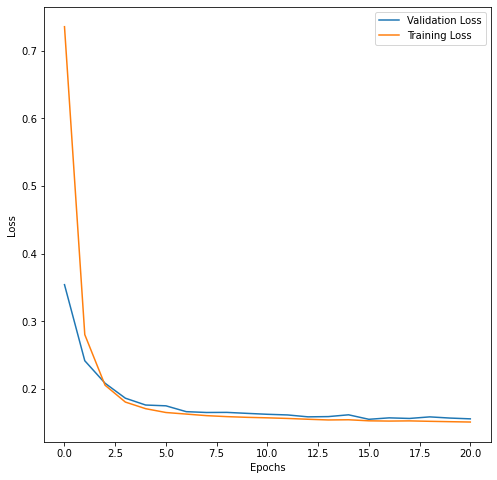

In [30]:
plot_loss(history)

We should see a plot which shows us loss against the epochs.
And the orange line is the training loss, and the blue
one is validation loss.
So our training loss is reducing. Our validation loss is
reducing as well.
But after, I think it's the 11th epoch, it basically does
not really reduce further. So the training stops.

Great! So it seems like our training worked. And now what we want
to do is take a look at the predictions. We will take
a look at both the raw predictions as well as predictions
converted to prices.

# Task 7: Predictions

## 7.1: Plot Raw Predictions

Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


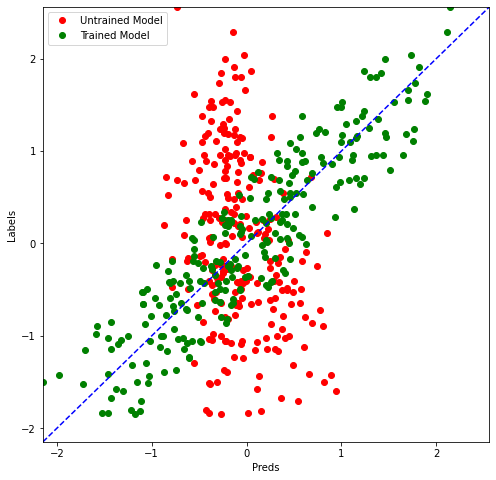

In [31]:
# Remember that we had some predictions on the untrained model. 
# Similarly, we will make some predictions on the train
# model on the same data set which is X test.
preds_on_trained = model.predict(x_test)

# Then we will use the compare predictions helper function, and we will pass the predictions on
# untrained model, predictions on the train model, and we also need to past the ground truth.
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

So the x-axis is our predictions and the y-axis is the labels or the ground truth.
The red dots are predictions from the untrained model, and the green dots are predictions from a train model.

So we can see the untrained model is actually pretty random. It's making predictions all over the place, and that's expected. But for the trained model, we can see the pattern.
It's pretty much a linear plot for the trained model predictions. 
Now it's making mistakes, of course, but the extent of those mistakes is, drastically less compared to
what's happening on the un-trained model.

So, in an ideal situation, our model should make predictions
same as labels. Which in our plot above, its the dotted blue line.
But our green trained model predictions are sort of
following the dotted blue line, which means that our model
training did actually work.

Now in the train model predictions that we just saw in this plot, in the x-axis, we can see the range is from minus two to something like 2.5.

And this is because, as we might remember, we normalized our
data before training, and our predictions are, of course,
going to be in that range.

But if we want to take a look at the price predictions, as
in the predictions converted to the original price range and
then compare them, then we can do that as well.

## 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

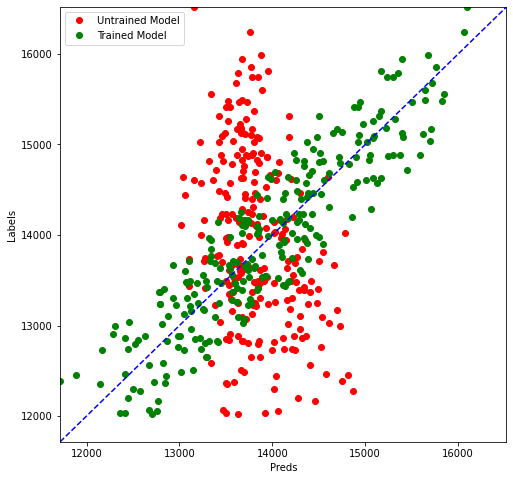

In [32]:
# Let's use the convert label value function that we wrote before. What we're doing is 
# for y in predictions on untrained, for every prediction we're converting it to a price. 
# So every prediction will be converted to its corresponding price. That's basically stored 
# in our price untrained.
price_untrained = [convert_label_value(y) for y in preds_on_untrained]

#Similarly, we will have price trained.
price_trained = [convert_label_value(y) for y in preds_on_trained]

# We also need the price for the ground truth (y_test)
price_test = [convert_label_value(y) for y in y_test]

# Once this is done, all we have to do is use the compared predictions helper function 
# and send price untrained, price trained, and price test.

compare_predictions(price_untrained, price_trained, price_test)

We pretty much get the same graph, but the ranges are now
different.
We can see the ranges in x-axis is from 12,000 to 16,000 or something for
both predictions and labels.
We can also see that the trained model is a lot more
aligned in its predictions to ground truth compared to the
untrained model, which is pretty random.

Now we know how to approach and solve regression problems with neural networks using __tensorflow__ and __keras__. We also perform normalization on our data. We used help of functions from scikit learn to split our
data into training and test set. And we also understood the use of callbacks.